In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [7]:
df = pd.concat([train_df.drop(columns=['Survived']),test_df]).sample(1309)

<AxesSubplot:ylabel='Density'>

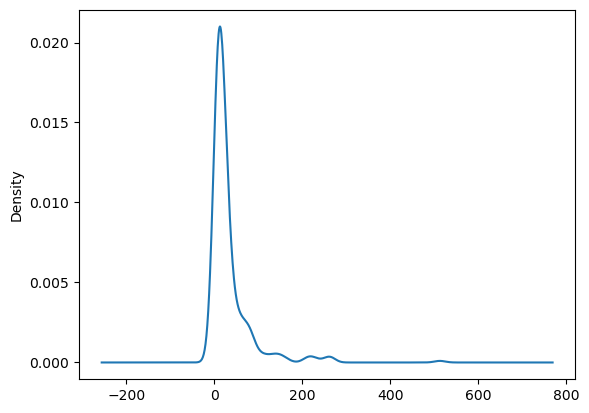

In [9]:
df['Fare'].plot(kind='kde')

In [31]:
# sample size = 50 -> 100 times
samples = []
for i in range(100):
    samples.append(df['Fare'].dropna().sample(50).values.tolist())

In [32]:
samples = np.array(samples)

In [33]:
sampling_means = samples.mean(axis=1)

In [34]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

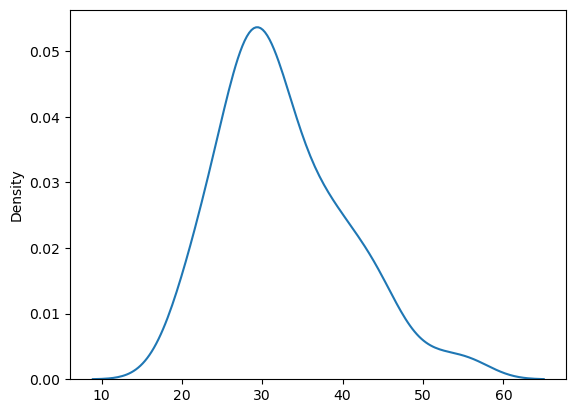

In [35]:
sns.kdeplot(sampling_means)

In [36]:
sampling_means.mean()

32.58436172

In [38]:
sampling_means.std()/np.sqrt(50)

1.1102839721857223

In [45]:
lower_limit = sampling_means.mean() - 2*sampling_means.std()
upper_limit = sampling_means.mean() + 2*sampling_means.std()

In [46]:
print('The range is',lower_limit,'-',upper_limit)

The range is 16.882575204494792 - 48.2861482355052


In [42]:
df['Fare'].dropna().mean()

33.29547928134557